In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Étape 1

## Téléchargez le contenu de la base de données et affichez les observations des 10 premières lignes.

In [4]:
df = pd.read_csv("panier.txt", header=0, delimiter="\t")
display(df.head(10))

,ID,Product
0,1,Peaches
1,2,Vegetable_Oil
2,2,Frozen_Corn
3,3,Plums
4,4,Pancake_Mix
5,5,Cheese
6,6,Cauliflower
7,7,2pct_Milk
8,8,98pct_Fat_Free_Hamburger
9,8,Potato_Chips


Nous avons une seule variable, de type qualitative, dont les modalité sont tous les produits achetés dans le commerce.

# Étape 2, 3 et 4
## Nombre de transactions ($T_{id}$), de produits et codage binaire

Pour connaîître le nombre de transactions, on va créer une table goupant tous les `ID` ayant la même valeur. En fait, avec la *cross table* obtenue, on va aussi pouvoir déterminer le nombre d'articles dans le commerce, car on compare la variable `ID` avec la variable `Product`, donc on obtient par construction le codage binaire.

In [5]:
grouped = pd.crosstab(df["ID"], df["Product"])
grouped

Product,100_Watt_Lightbulb,2pct_Milk,40_Watt_Lightbulb,60_Watt_Lightbulb,75_Watt_Lightbulb,98pct_Fat_Free_Hamburger,AA_Cell_Batteries,Apple_Cinnamon_Waffles,Apple_Drink,Apple_Fruit_Roll,Apple_Jam,Apple_Jelly,Apple_Juice,Apple_Sauce,Apple_Soda,Apples,Aspirin,Avocado_Dip,BBQ_Potato_Chips,Baked_Beans,Bananas,Beef_Hot_Dogs,Beef_Jerky,Beef_Soup,Beets,Black-eyed_Peas,Blueberry_Bagels,Blueberry_Muffins,Blueberry_Waffles,Blueberry_Yogurt,Bologna,Broccoli,Brown_Sugar,Brown_Sugar_Grits,Brown_Sugar_Oatmeal,Bubble_Gum,Buttered_Popcorn,Buttermilk,C_Cell_Batteries,Cabbage,...,Strawberry_Yogurt,Sugar,Sugar_Cookies,Summer_Sausage,Sunglasses,Sweat_Potatoes,Sweet_Potatoes,Sweet_Relish,Taco_Salad,Tangerines,Tissue,Tissues,Toilet_Bowl_Cleaner,Toilet_Paper,Tomato_Sauce,Tomato_Soup,Tomatoes,Toothbrush,Toothpaste,Trash_Bags,Tuna_Spread,Turkey_Noodle_Soup,Turkey_TV_Dinner,Vanilla_Ice_Cream,Vanilla_Wafers,Vegetable_Oil,Vegetable_Soup,Waffles,Wash_Towels,Wheat_Bread,White_Bread,White_Wine,White_Zinfandel_Wine,Whole_Corn,Whole_Green_Beans,Whole_Milk,Window_Cleaner,Wood_Polish,flav_Fruit_Bars,flav_Ice
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1359,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0


On peut voir qu'il y a 1360 lignes et 303 colonnes, ce qui correspond respectivement au nombre de transactions et de produits.

# $\boxed{\color{green}{BONUS}} \rightarrow$ tableau de co-occurence

In [12]:
coocc = grouped.T.dot(grouped)
coocc

Product,100_Watt_Lightbulb,2pct_Milk,40_Watt_Lightbulb,60_Watt_Lightbulb,75_Watt_Lightbulb,98pct_Fat_Free_Hamburger,AA_Cell_Batteries,Apple_Cinnamon_Waffles,Apple_Drink,Apple_Fruit_Roll,Apple_Jam,Apple_Jelly,Apple_Juice,Apple_Sauce,Apple_Soda,Apples,Aspirin,Avocado_Dip,BBQ_Potato_Chips,Baked_Beans,Bananas,Beef_Hot_Dogs,Beef_Jerky,Beef_Soup,Beets,Black-eyed_Peas,Blueberry_Bagels,Blueberry_Muffins,Blueberry_Waffles,Blueberry_Yogurt,Bologna,Broccoli,Brown_Sugar,Brown_Sugar_Grits,Brown_Sugar_Oatmeal,Bubble_Gum,Buttered_Popcorn,Buttermilk,C_Cell_Batteries,Cabbage,...,Strawberry_Yogurt,Sugar,Sugar_Cookies,Summer_Sausage,Sunglasses,Sweat_Potatoes,Sweet_Potatoes,Sweet_Relish,Taco_Salad,Tangerines,Tissue,Tissues,Toilet_Bowl_Cleaner,Toilet_Paper,Tomato_Sauce,Tomato_Soup,Tomatoes,Toothbrush,Toothpaste,Trash_Bags,Tuna_Spread,Turkey_Noodle_Soup,Turkey_TV_Dinner,Vanilla_Ice_Cream,Vanilla_Wafers,Vegetable_Oil,Vegetable_Soup,Waffles,Wash_Towels,Wheat_Bread,White_Bread,White_Wine,White_Zinfandel_Wine,Whole_Corn,Whole_Green_Beans,Whole_Milk,Window_Cleaner,Wood_Polish,flav_Fruit_Bars,flav_Ice
Product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100_Watt_Lightbulb,41,22,4,10,9,18,11,8,5,9,10,10,5,7,2,5,16,6,8,10,7,6,10,9,4,6,4,10,7,5,14,7,9,2,3,8,8,6,14,6,...,8,8,16,5,2,3,7,11,4,7,3,7,5,14,9,8,17,9,13,7,5,6,8,2,8,10,8,11,8,15,21,9,7,8,6,8,2,6,8,7
2pct_Milk,22,149,7,26,25,52,30,17,20,30,25,31,14,22,6,40,47,22,31,28,43,8,28,22,21,24,9,19,21,19,39,26,25,6,7,24,21,24,34,12,...,26,22,40,27,14,6,19,56,16,17,6,29,24,48,24,27,44,23,59,28,10,15,23,9,20,30,24,37,18,58,70,22,23,20,21,26,7,15,29,24
40_Watt_Lightbulb,4,7,13,6,1,6,2,3,2,3,3,3,2,2,2,6,2,4,5,2,3,2,4,3,4,1,3,1,1,2,4,2,3,2,2,3,4,2,5,2,...,3,1,3,5,1,3,4,6,2,2,2,1,4,3,4,3,3,2,6,5,2,2,5,3,2,4,1,1,1,4,5,2,3,5,3,5,2,3,3,3
60_Watt_Lightbulb,10,26,6,51,8,20,10,7,6,10,13,10,6,8,3,18,24,6,13,11,19,8,14,8,8,6,7,9,11,5,19,11,9,3,3,15,7,7,15,4,...,10,9,17,14,5,4,9,23,9,9,3,7,11,23,10,11,18,9,26,12,6,8,9,3,8,13,11,17,6,20,31,9,10,10,12,11,3,7,14,10
75_Watt_Lightbulb,9,25,1,8,43,18,12,3,7,12,11,9,7,9,2,11,21,9,9,7,11,6,9,9,7,8,4,6,9,10,15,10,12,2,3,14,6,8,15,3,...,7,9,11,8,6,2,6,15,6,8,2,14,8,16,9,5,14,12,15,9,6,7,6,2,11,11,9,16,5,19,26,8,8,9,7,10,4,5,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whole_Milk,8,26,5,11,10,19,13,8,10,12,8,9,7,11,2,20,20,8,9,8,17,8,10,12,9,10,5,10,11,11,20,11,11,2,5,10,8,8,12,8,...,12,10,17,11,7,4,10,19,5,6,4,11,11,24,11,11,18,11,25,11,8,2,10,4,8,7,13,20,8,17,27,7,13,8,6,48,2,11,13,10
Window_Cleaner,2,7,2,3,4,5,2,2,3,4,1,2,2,4,3,4,3,5,1,1,5,2,3,3,2,3,2,3,5,4,4,1,3,2,2,2,3,4,6,2,...,3,4,4,4,3,3,2,7,2,2,2,4,5,4,2,4,3,2,5,4,2,4,3,2,4,2,2,3,1,5,5,2,5,5,3,2,12,1,3,3
Wood_Polish,6,15,3,7,5,20,8,7,6,6,5,6,5,10,2,14,11,5,10,6,10,6,3,9,7,4,3,7,5,6,12,9,5,1,2,8,8,7,8,5,...,9,9,13,6,7,1,9,16,9,4,2,8,7,16,10,5,11,7,14,8,3,4,7,2,3,7,10,12,6,11,20,6,5,6,5,11,1,32,9,6


Produits les plus fréquemment achetés:

In [26]:
grouped.sum(axis=0).sort_values(ascending=False)

Product
Eggs                        167
White_Bread                 162
2pct_Milk                   149
Potato_Chips                133
98pct_Fat_Free_Hamburger    127
                           ... 
Nasal_Spray                   8
Plain_English_Muffins         8
Daily_Newspaper               8
Oats_and_Nuts_Cereal          7
Celery                        7
Length: 303, dtype: int64

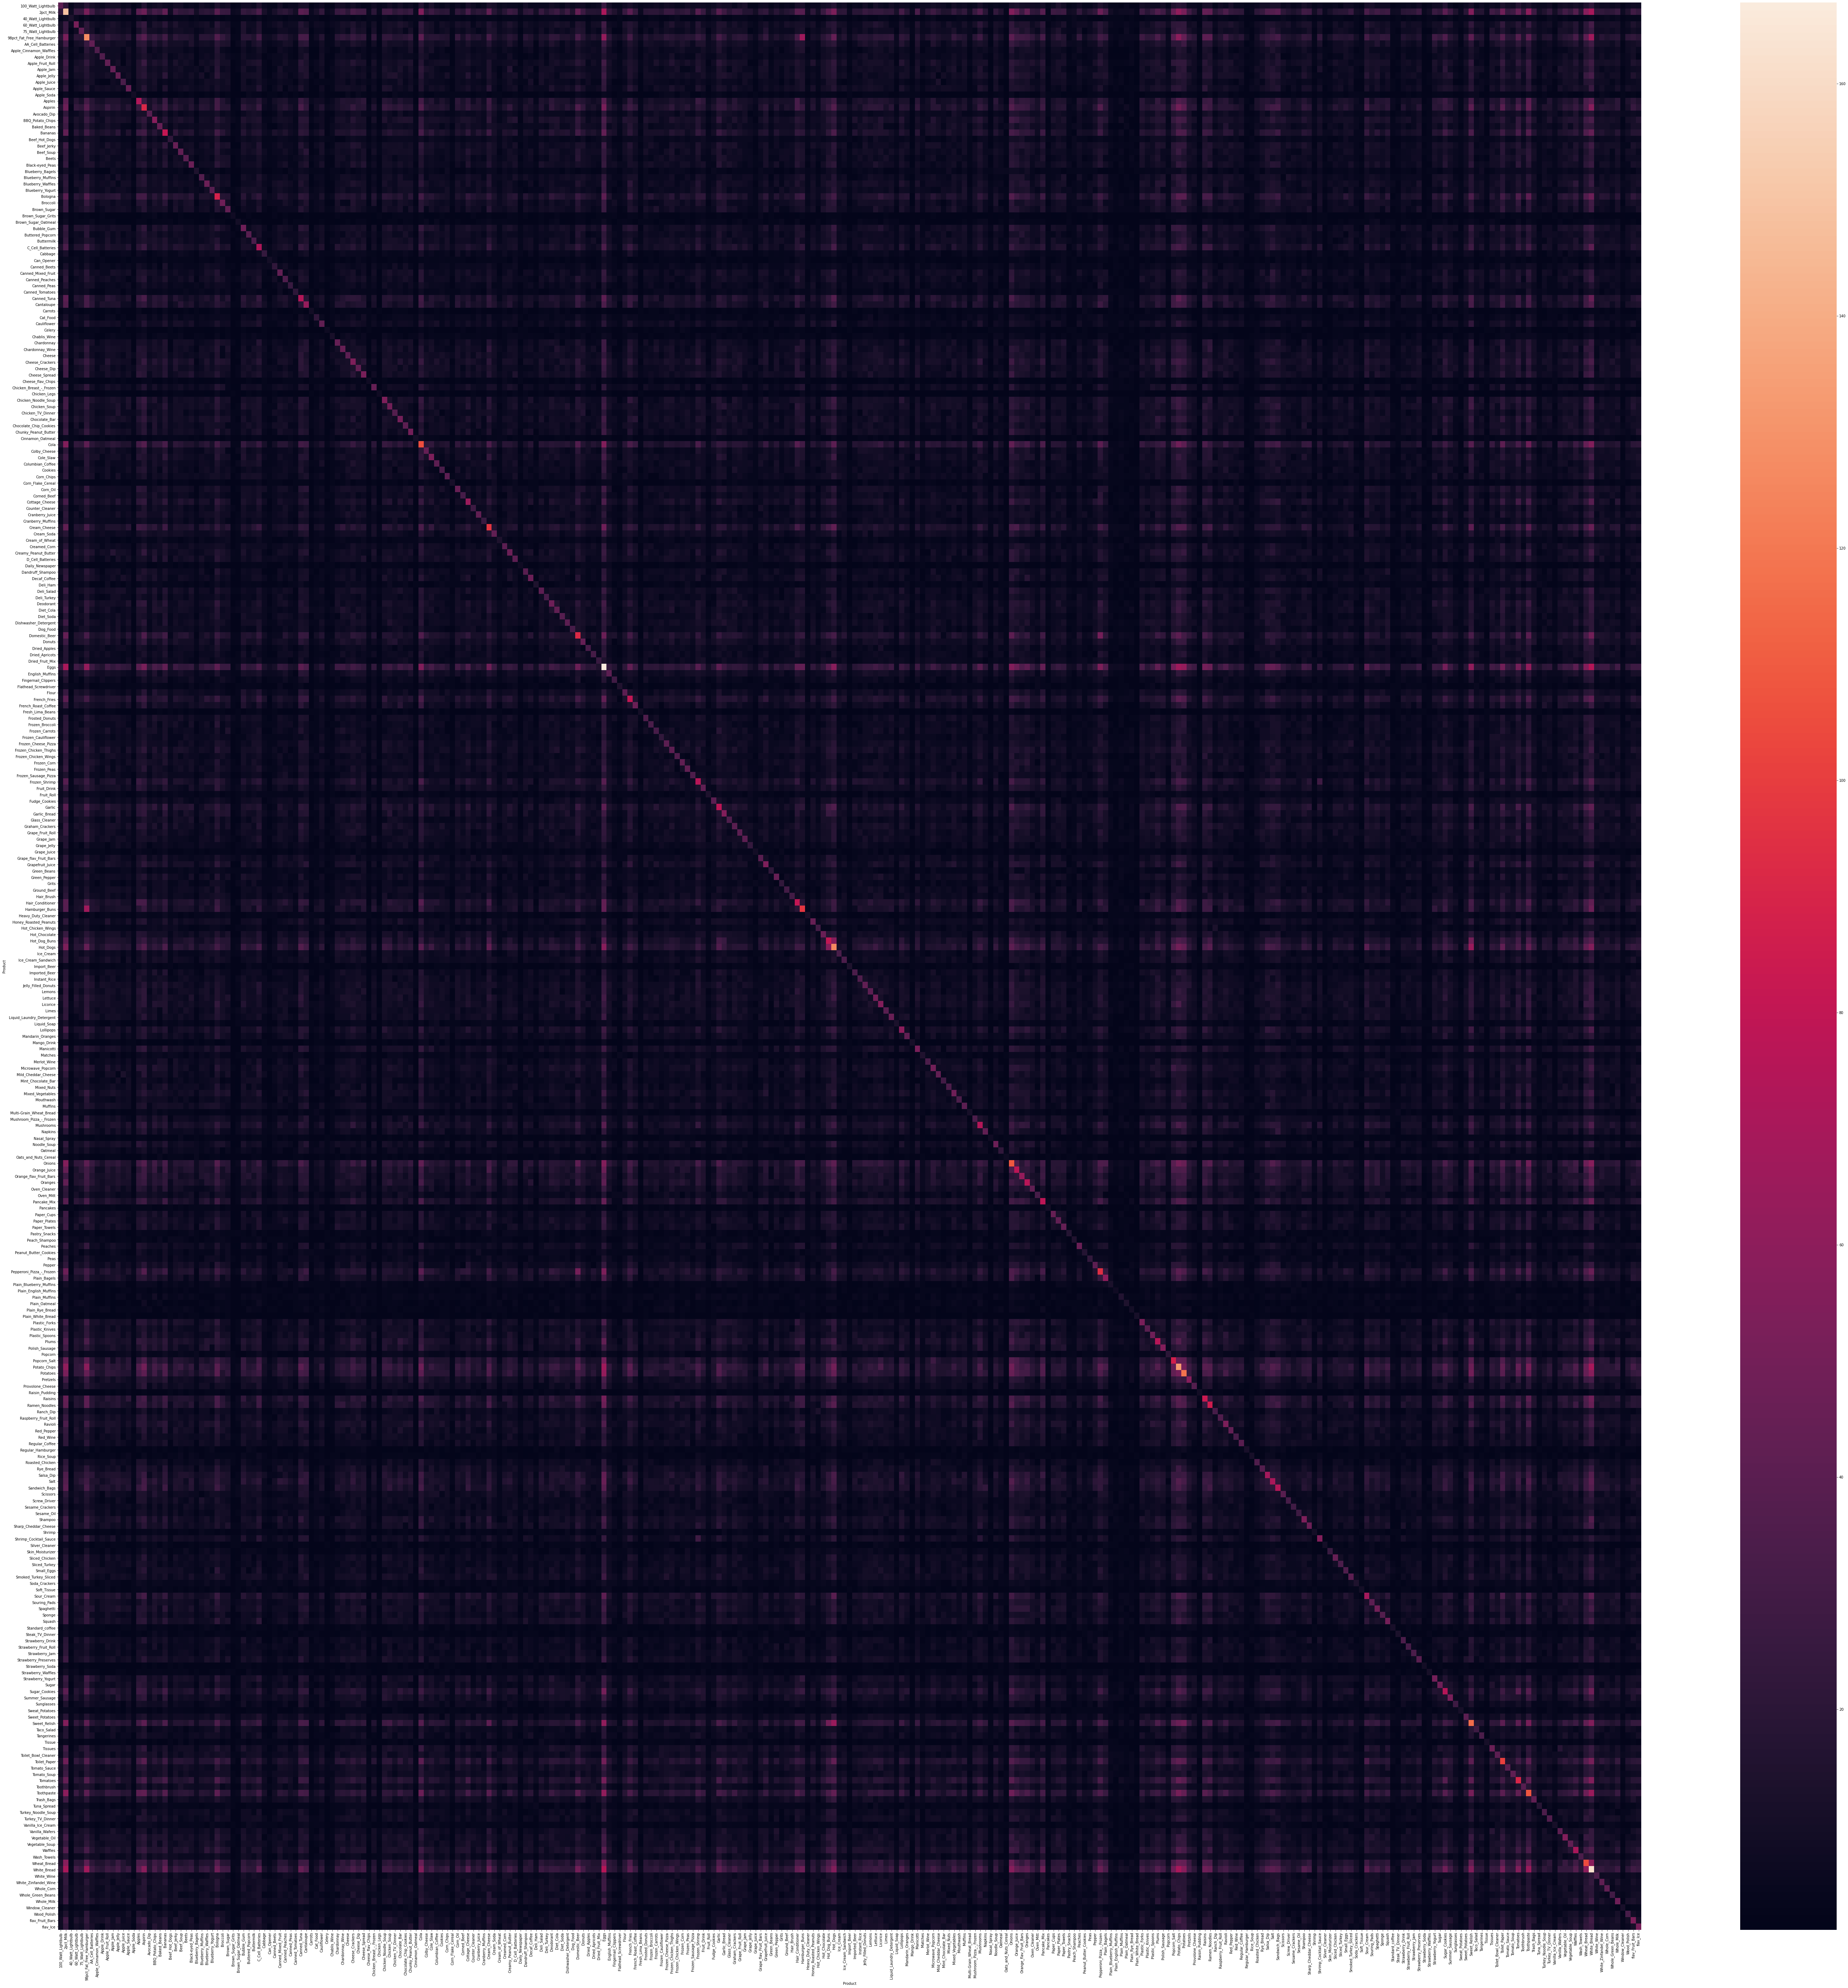

In [17]:
plt.figure(figsize=(100,100))
sns.heatmap(coocc)

# Étape 5
## Déterminer l'ensemble des items fréquents avec une valeur minimale de suport de 0.025 et un cardinal $\le$ 4

In [6]:
min_support = 0.025
cardinal = 4

In [7]:
ensembles_IF = apriori(grouped,min_support=min_support,use_colnames=True, max_len=cardinal)

# Étape 6
## Afficher les 10 premiers itemsets et les 10 derniers itemsets et commenter

In [8]:
display(ensembles_IF.head(10))
display(ensembles_IF.tail(10))

,support,itemsets
0,0.030147,(100_Watt_Lightbulb)
1,0.109559,(2pct_Milk)
2,0.037500,(60_Watt_Lightbulb)
3,0.031618,(75_Watt_Lightbulb)
4,0.093382,(98pct_Fat_Free_Hamburger)
5,0.031618,(AA_Cell_Batteries)
6,0.025735,(Apple_Cinnamon_Waffles)
7,0.026471,(Apple_Drink)
8,0.031618,(Apple_Fruit_Roll)
9,0.032353,(Apple_Jam)


,support,itemsets
593,0.027206,"(White_Bread, Potato_Chips, Wheat_Bread)"
594,0.025000,"(White_Bread, Potatoes, Toilet_Paper)"
595,0.025735,"(White_Bread, Potatoes, Toothpaste)"
596,0.027941,"(White_Bread, Toothpaste, Sweet_Relish)"
597,0.025735,"(White_Bread, Toothpaste, Toilet_Paper)"
598,0.025735,"(White_Bread, Tomatoes, Toothpaste)"
599,0.026471,"(White_Bread, Wheat_Bread, Toothpaste)"
600,0.026471,"(2pct_Milk, Potato_Chips, White_Bread, Eggs)"
601,0.025735,"(2pct_Milk, White_Bread, Toothpaste, Eggs)"
602,0.025000,"(2pct_Milk, Potato_Chips, White_Bread, Toothpa..."


On constate que les IF ayant le support le plus élevé sont ceux ayant seulement un seul item dans le set et inversement, ceux ayant un support plus faible ont 4 items dans le set. En effet, on peut voir que le support du premier itemset est environ 4.4 fois celui du dernier itemset. Du reste, nous avons 602 itemsets tels que le support est supérieur ou égal à 0.025.

Il est à noter que la manière dont l'algorithme est conçu fait en sorte qu'on retrouve en premier les itemset contenant 1 article. En effet, on commence avec $n$ ensembles contenant chacun 1 article et pour chacun, on regarde si son support est supérieur au seuil, et si c'est le cas, alors il sera combiné (2 à 2) avec les autres articles qui auront aussi passé la valeur minimale de support. On fait cette procédure jusqu'à ce qu'on ait atteint le cardinal maximum ou bien qu'il n'y ait plus d'ensembles tels que le support est supérieur au seuil.



# Étape 7
## Générer les règles d’association avec un seuil de confiance minimal à 0.75

In [9]:
assoc_rules = association_rules(ensembles_IF, min_threshold=0.75)

# Étape 8
## Afficher les 5 premières règles

In [10]:
display(assoc_rules.head(5))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(2pct_Milk, Aspirin)",(White_Bread),0.034559,0.119118,0.027206,0.787234,6.608878,0.023089,4.140147
1,"(2pct_Milk, Bananas)",(White_Bread),0.031618,0.119118,0.025735,0.813953,6.833190,0.021969,4.734743
2,"(White_Bread, Bananas)",(2pct_Milk),0.032353,0.109559,0.025735,0.795455,7.260525,0.022191,4.353268
3,"(Wheat_Bread, Cola)",(2pct_Milk),0.032353,0.109559,0.025735,0.795455,7.260525,0.022191,4.353268
4,"(2pct_Milk, Popcorn_Salt)",(Eggs),0.033088,0.122794,0.027206,0.822222,6.695941,0.023143,4.934283


# Étape 9
## Afficher les 10 meilleures règles en se basant sur le lift

In [11]:
display(assoc_rules.sort_values(by = "lift", ascending=False).head(10))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
46,"(2pct_Milk, Potato_Chips, White_Bread)",(Toothpaste),0.033088,0.079412,0.025000,0.755556,9.514403,0.022372,3.766043
29,"(Hot_Dog_Buns, Sweet_Relish)",(Hot_Dogs),0.036029,0.092647,0.030147,0.836735,9.031422,0.026809,5.557537
16,"(White_Bread, Hamburger_Buns)",(98pct_Fat_Free_Hamburger),0.034559,0.093382,0.026471,0.765957,8.202379,0.023243,3.873730
48,"(2pct_Milk, White_Bread, Toothpaste)",(Potato_Chips),0.033088,0.097794,0.025000,0.755556,7.725982,0.021764,3.690842
8,"(Wheat_Bread, Onions)",(2pct_Milk),0.034559,0.109559,0.028676,0.829787,7.573897,0.024890,5.231342
49,"(White_Bread, Potato_Chips, Toothpaste)",(2pct_Milk),0.030147,0.109559,0.025000,0.829268,7.569160,0.021697,5.215441
17,"(Wheat_Bread, 98pct_Fat_Free_Hamburger)",(White_Bread),0.029412,0.119118,0.026471,0.900000,7.555556,0.022967,8.808824
13,"(Wheat_Bread, Toothpaste)",(2pct_Milk),0.034559,0.109559,0.027941,0.808511,7.379694,0.024155,4.650082
37,"(Toothpaste, Toilet_Paper)",(White_Bread),0.029412,0.119118,0.025735,0.875000,7.345679,0.022232,7.047059
35,"(Potatoes, Toilet_Paper)",(White_Bread),0.028676,0.119118,0.025000,0.871795,7.318772,0.021584,6.870882


- Le lift est une bonne mesure de performance de la règle d’association qui mesure l’intérêt de la règle, sa force;
- Le lift est la confiance de la règle divisée par la valeur espérée de la confiance. Il est donné par :
$$\mbox{lift}(R) = \frac{Sup(X \cup Y)}{Sup(X) Sup(Y)}$$
- Un lift supérieur à 1 indique qu'il existe bien un lien entre les 2 éléments X et Y.

Ainsi, on peut dire que tous les éléments se trouvant dans le tableau ci-dessus ont un bon score ($7 \le \mbox{lift} \le 10$). Si l'on devait interpréter la première ligne, on pourrait dire que (White_Bread, 2pct_Milk, Potato_Chips) $\rightarrow$ (Toothpaste) [0.025, 0.76], c'est-à-dire qu'on retrouve simultanément ces 3 articles dans 2.5% des transactions et on est confiant à 76% que si nous avons l'antécédant, alors on retrouvera le conséquent.